<a href="https://colab.research.google.com/github/pmantramurti/CMPE257-Fall23-Pranay-Mantramurti/blob/take-home-exam/Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

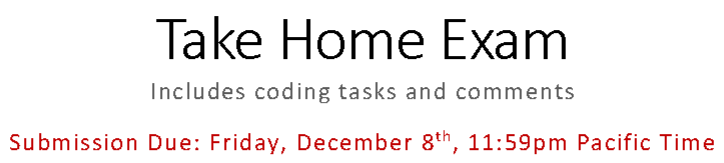

In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#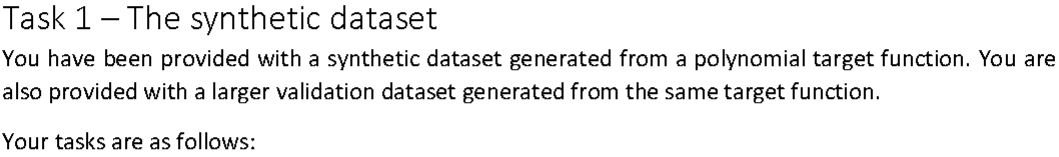

In [74]:
random.seed(117)
df_synth_train = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ExamData/synthetic_dataset.csv', delimiter=',')
df_synth_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ExamData/synthetic_test_dataset.csv', delimiter=',')
df_synth_train['bias'] = 1
df_synth_test['bias'] = 1
df_synth_train.shape

(50, 4)

##image.png

In [98]:
def getSign(x):
  if x < 0:
    return -1
  if x >= 0:
    return 1

def getDot(w, i, df):
  ans = np.dot(w, df.iloc[i])
  return ans

def adjustWeights(w, i, df, df_out, n, s):
  yAdj = n*(df_out[i] - s)
  w2 = np.array(w) + np.array(df.iloc[i])*yAdj
  return w2

def Pocket(df_in, df_out, n):
  w = [0]*df_in.shape[1]
  wFin = w.copy()
  accurate = False
  updates = 0
  train_err = 0
  min_err = np.inf
  shown = False
  while not accurate and updates < 5000 :
    updates += 1
    accurate = True
    i = random.randrange(0, df_in.shape[0])
    s = getDot(w, i, df_in)
    if s*df_out[i] <= 0:
      w = adjustWeights(w, i, df_in, df_out, n, s)
    train_out = np.dot(w, np.transpose(df_in))
    train_err = np.sum(np.square((train_out - np.array(df_out))))/df_in.shape[0]
    if train_err < min_err:
      min_err = train_err
      wFin = w.copy()
    if train_err != 0:
      accurate = False
  return wFin, min_err

In [80]:
def trainModel(w, test_in, test_out):
  err = 0
  corr = 0
  size = len(test_in)
  for i in range(size):
    test_res = getSign(np.dot(w, test_in.iloc[i]))
    if test_res != df_synth_test.y[i]:
      corr += 1
      err += (test_res - test_out[i])**2
  err = err/size
  acc = corr/size
  return err, acc

In [99]:
n = 0.01
train_input = df_synth_train[['bias', 'x1', 'x2']]
train_output = df_synth_train['y']

w, Step1_trainErr = Pocket(train_input, train_output, n)

test_input = df_synth_test[['bias', 'x1', 'x2']]
test_output = df_synth_test['y']

Step1_testErr, Step1_testAcc = trainModel(w, test_input, test_output)

print('Train Error :', Step1_trainErr)
print('Test Error :', Step1_testErr)
print('Test Accuracy :', Step1_testAcc)

Train Error : 0.8685707448625816
Test Error : 1.584
Test Accuracy : 0.396


##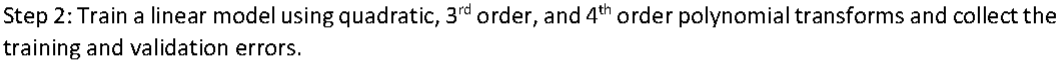

In [100]:
def genTransform(df):
  df['x1^2'] = np.array(df['x1'])**2                        #x1^2
  df['x1x2'] = np.array(df['x1'])*df['x2']                  #x1 * x2
  df['x2^2'] = np.array(df['x2'])**2                        #x2^2

  df['x1x2^2'] = np.array(df['x1'])*np.array(df['x2^2'])    #x1 * x2^2
  df['x1^2x2'] = np.array(df['x2'])*np.array(df['x1^2'])    #x2 * x1^2
  df['x1^3'] = np.array(df['x1']) ** 3                      #x1^3
  df['x2^3'] = np.array(df['x2']) ** 3                      #x2^3

  df['x1^4'] = np.array(df['x1']) ** 4                      #x1^4
  df['x2^4'] = np.array(df['x2']) ** 4                      #x2^4
  df['x1^2x2^2'] = np.array(df['x1^2'])*np.array(df['x2^2'])#x1^2 * x2^2
  df['x1x2^3'] = np.array(df['x1'])*np.array(df['x2^3'])    #x1 * x2^3
  df['x1^3x2'] = np.array(df['x2'])*np.array(df['x1^3'])    #x2 * x1^3
  return df

df_synth_train = genTransform(df_synth_train)
df_synth_test = genTransform(df_synth_test)

### Quadratic Transform

In [101]:
n = 0.01
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2']]
train_output = df_synth_train['y']

w, Step2_Quad_trainErr = Pocket(train_input, train_output, n)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2']]
test_output = df_synth_test['y']

Step2_Quad_testErr, Step2_Quad_testAcc = trainModel(w, test_input, test_output)

print('Train Error :', Step2_Quad_trainErr)
print('Test Error :', Step2_Quad_testErr)
print('Test Accuracy :', Step2_Quad_testAcc)

<ipython-input-98-2279a82ace47>:32: RuntimeWarning: overflow encountered in square
  train_err = np.sum(np.square((train_out - np.array(df_out))))/df_in.shape[0]
<ipython-input-98-2279a82ace47>:13: RuntimeWarning: invalid value encountered in add
  w2 = np.array(w) + np.array(df.iloc[i])*yAdj


Train Error : 2093.624551428405
Test Error : 1.84
Test Accuracy : 0.46


### 3rd Order Transform

In [104]:
n = 0.01
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2',
                              'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2']]
train_output = df_synth_train['y']

w, Step2_3rd_trainErr = Pocket(train_input, train_output, n)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2',
                            'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2']]
test_output = df_synth_test['y']

Step2_3rd_testErr, Step2_3rd_testAcc = trainModel(w, test_input, test_output)

print('Train Error :', Step2_3rd_trainErr)
print('Test Error :', Step2_3rd_testErr)
print('Test Accuracy :', Step2_3rd_testAcc)

<ipython-input-98-2279a82ace47>:32: RuntimeWarning: overflow encountered in square
  train_err = np.sum(np.square((train_out - np.array(df_out))))/df_in.shape[0]
<ipython-input-98-2279a82ace47>:13: RuntimeWarning: invalid value encountered in add
  w2 = np.array(w) + np.array(df.iloc[i])*yAdj


Train Error : 15468799.096573496
Test Error : 1.704
Test Accuracy : 0.426


### 4th Order Transform

In [105]:
n = 0.01
train_input = df_synth_train[['bias', 'x1', 'x2',
                              'x1^2', 'x2^2', 'x1x2',
                              'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2',
                              'x1^4', 'x2^4', 'x1^2x2^2', 'x1^3x2', 'x1x2^3']]
train_output = df_synth_train['y']

w, Step2_4th_trainErr = Pocket(train_input, train_output, n)

test_input = df_synth_test[['bias', 'x1', 'x2',
                            'x1^2', 'x2^2', 'x1x2',
                            'x1^3', 'x2^3', 'x1^2x2', 'x1x2^2',
                            'x1^4', 'x2^4', 'x1^2x2^2', 'x1^3x2', 'x1x2^3']]
test_output = df_synth_test['y']

Step2_4th_testErr, Step2_4th_testAcc = trainModel(w, test_input, test_output)

print('Train Error :', Step2_4th_trainErr)
print('Test Error :', Step2_4th_testErr)
print('Test Accuracy :', Step2_4th_testAcc)

<ipython-input-98-2279a82ace47>:32: RuntimeWarning: overflow encountered in square
  train_err = np.sum(np.square((train_out - np.array(df_out))))/df_in.shape[0]
<ipython-input-98-2279a82ace47>:13: RuntimeWarning: invalid value encountered in add
  w2 = np.array(w) + np.array(df.iloc[i])*yAdj


Train Error : 261328680283.79956
Test Error : 2.16
Test Accuracy : 0.54
